In [1]:
import tensorflow as tf
from jupyterthemes import jtplot

2023-04-21 00:32:39.129062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 00:32:39.758491: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

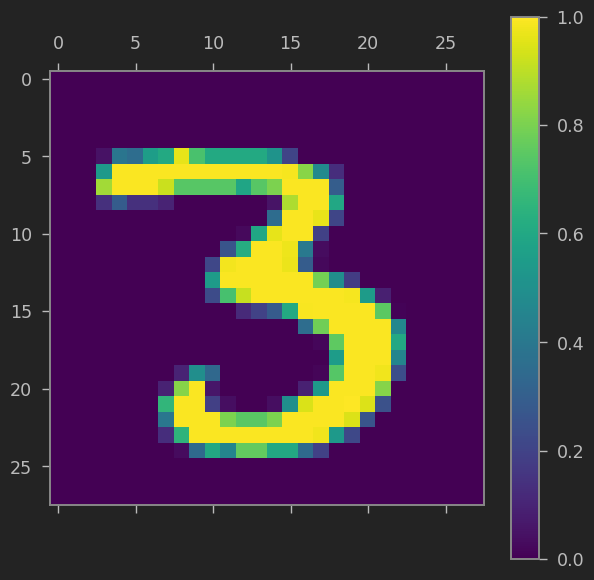

3

In [22]:
plt.matshow(X_train[12])
plt.colorbar()
plt.show()
y_train[12]

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

In [18]:
X_train.shape

(60000, 28, 28)

In [48]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(units=100, activation='relu'),
                            tf.keras.layers.Dense(units=10)])

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [50]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2763 - accuracy: 0.9210
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1275 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0888 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0666 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0524 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0421 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0339 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0290 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [51]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\n', test_acc)

313/313 - 0s - loss: 0.0843 - accuracy: 0.9768 - 251ms/epoch - 800us/step

 0.9768000245094299


In [52]:
predictions = model.predict(X_test)

313/313 [==============================] - 0s 537us/step


In [53]:
predictions[0]

array([ -8.111377 ,  -6.869727 ,  -1.2382159,   2.0219886, -16.08268  ,
        -9.658419 , -22.864136 ,  17.666714 ,  -5.544152 ,   1.0214878],
      dtype=float32)

In [54]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [55]:
predictions = probability_model.predict(X_test)

313/313 [==============================] - 0s 513us/step


In [56]:
predictions[0]

array([6.3784785e-12, 2.2077945e-11, 6.1615948e-09, 1.6053964e-07,
       2.2020371e-15, 1.3578311e-12, 2.4984790e-18, 9.9999988e-01,
       8.3109256e-11, 5.9029670e-08], dtype=float32)

In [57]:
predicted_labels = [np.argmax(i) for i in predictions]

In [58]:
cm = tf.math.confusion_matrix(predictions=predicted_labels, labels=y_test)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    2,    1,    1,    1,    1,    2,    1],
       [   0, 1122,    4,    2,    0,    0,    2,    1,    4,    0],
       [   5,    1, 1006,    0,    3,    0,    1,    4,   10,    2],
       [   0,    0,    2,  986,    0,    1,    0,    7,    2,   12],
       [   1,    0,    3,    1,  959,    0,    1,    7,    0,   10],
       [   3,    0,    0,   17,    1,  859,    1,    4,    4,    3],
       [   6,    1,    3,    2,    2,    7,  930,    1,    6,    0],
       [   0,    2,    7,    0,    0,    0,    0, 1013,    1,    5],
       [   2,    0,    1,    7,    6,    3,    0,    5,  945,    5],
       [   2,    2,    0,    2,    7,    2,    0,   13,    3,  978]],
      dtype=int32)>

In [41]:
import seaborn as sns

Text(58.388888888888886, 0.5, 'True')

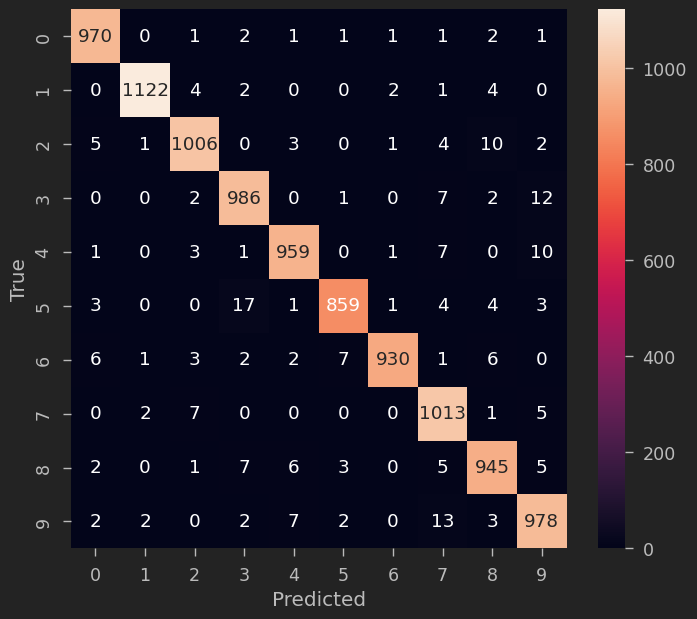

In [59]:
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')